# Basic LangGraph App
* The goal of this exercise is to get familiar with the main components and steps of a basic LangGraph app.

## Setup

#### After you download the code from the github repository in your computer
In terminal:
* cd project_name
* pyenv local 3.11.4
* poetry install
* poetry shell

#### To open the notebook with Jupyter Notebooks
In terminal:
* jupyter lab

Go to the folder of notebooks and open the right notebook.

#### To see the code in Virtual Studio Code or your editor of choice.
* open Virtual Studio Code or your editor of choice.
* open the project-folder
* open the 003-basic-graph.py file

## Create your .env file
* In the github repo we have included a file named .env.example
* Rename that file to .env file and here is where you will add your confidential api keys. Remember to include:
* OPENAI_API_KEY=your_openai_api_key
* LANGCHAIN_TRACING_V2=true
* LANGCHAIN_ENDPOINT=https://api.smith.langchain.com
* LANGCHAIN_API_KEY=your_langchain_api_key
* LANGCHAIN_PROJECT=your_project_name

We will call our LangSmith project **003-basic-graph**.

## Track operations
From now on, we can track the operations **and the cost** of this project from LangSmith:
* [smith.langchain.com](https://smith.langchain.com)

## Connect with the .env file located in the same directory of this notebook

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [ ]:
#pip install python-dotenv

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai_api_key = os.environ["OPENAI_API_KEY"]

#### Install LangChain

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [3]:
#!pip install langchain

## Connect with an LLM

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [4]:
#!pip install langchain-openai

In [2]:
from langchain_openai import ChatOpenAI

chatModel35 = ChatOpenAI(model="gpt-3.5-turbo-0125")
chatModel4o = ChatOpenAI(model="gpt-4o")

## Building a simple app (called graph in langgraph) that decides if the user will vote for Trump or Harris

* Here you have a graphic representation of the app we will build:

![Simple graph](graph001.png)

## Define the state schema
* The first thing we will do is to define the state of the app. 
* The state schema configures what will be in the state and with what format.
* The schema will usually be either a TypedDict or a Pydantic model.

* For this example, the State class will only have one key, graph_state, with a string format.

In [4]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

The line of code:

```python
from typing_extensions import TypedDict
```

is importing the `TypedDict` class from the `typing_extensions` module.

#### What is `TypedDict`?

- **`TypedDict`** allows you to define dictionaries with a specific structure. It enables you to specify the exact keys and the types of their associated values, making your code more explicit and type-safe.
- For example, instead of a plain dictionary like `{"name": "Alice", "age": 30}`, you can define a `TypedDict` to enforce that `name` must always be a string and `age` must always be an integer.

#### Why `typing_extensions`?

- The `typing_extensions` module is used to provide features from Python's `typing` module that might not be available in older Python versions. If you're using a Python version where `TypedDict` is not yet included in the standard library, you can still use it via `typing_extensions`.

Let’s break down this code step by step:

#### Code Explanation:

```python
class State(TypedDict):
    graph_state: str
```

- Here, a new dictionary-like structure called `State` is defined.
- `State` inherits from `TypedDict`, which means it behaves like a dictionary, but it has specific rules about what keys and values it must have.

In this case:
- `State` must have a key named `graph_state`.
- The value for `graph_state` must always be a string (`str`).

#### How It Works:

1. **Definition of `State`:**
   - This defines a type for a dictionary that looks like this: `{"graph_state": <some string>}`.

2. **Example Usage:**

```python
state: State = {"graph_state": "active"}  # This is valid
```

- The key `graph_state` is present, and its value is a string, so it works.

```python
state: State = {"graph_state": 123}  # This is invalid
```

- This would raise a type-checking error because the value `123` is not a string.

#### Why Use This?

- **Clarity:** Makes it clear what the structure of the dictionary should be.
- **Type Safety:** Helps avoid bugs by catching mistakes if you use the wrong key or value type.
- **Documentation:** Serves as a form of documentation for what the expected dictionary looks like.

## Define the Nodes of the app
* The Nodes of this app are defined as python functions.
* The first argument of a Node function is the state. Each node can access the key `graph_state`, with `state['graph_state']`.
* In this exercise each node will return a new value of the state key `graph_state`. **The new value returned by each node will overwrite the prior state value**.
    * If the graph flow is node 1 to node 2, the final state will be " I will vote for Donald Trump".
    * If the graph flow is node 1 to node 3, the final state will be " I will vote for Kamala Harris".

In [1]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I will vote for"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" Donald Trump"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" Kamala Harris"}

## Define the Edges that connect the Nodes
* Normal Edges go from one node to another.
* Conditional Edges are used when you want to optionally route between nodes. They are functions that select the next node based upon some logic.

* In our example, to replicate the U.S. elections result we will define a function to simulate a 60% probability of voting for Donald Trump.

In [6]:
import random
from typing import Literal

def decide_vote(state) -> Literal["node_2", "node_3"]:
    """
    Decide on the next node to visit based on a 60/40 probability split.
    """
    # Simulating a 60% probability for "node_2"
    if random.random() < 0.6:  # 60% chance
        return "node_2"
    
    # Remaining 40% chance
    return "node_3"

Let’s break down the code step by step:

#### Code Explanation

1. **Imports:**

```python
import random
from typing import Literal
```

- `random` is a module for generating random numbers.
- `Literal` is a type hint from `typing` that lets you specify an exact value or set of values that a function can return or accept.

2. **Function Definition:**

```python
def decide_vote(state) -> Literal["node_2", "node_3"]:
    """
    Decide on the next node to visit based on a 60/40 probability split.
    """
```

- The function is named `decide_vote`.
- It takes one input called `state`.
- The function **always returns either `"node_2"` or `"node_3"`.** This is enforced by the return type `Literal["node_2", "node_3"]`.

3. **Logic:**

```python
if random.random() < 0.6:  # 60% chance
    return "node_2"
```

- `random.random()` generates a random float between `0` and `1`.
- If this random number is less than `0.6` (60% chance), the function returns `"node_2"`.


```python
return "node_3"  # Remaining 40% chance
```

- If the random number is not less than `0.6` (meaning it falls in the 40% chance), the function returns `"node_3"`.

#### Example of How It Works:

- Every time the function is called, it makes a decision based on random chance:
  - **60% chance:** Returns `"node_2"`.
  - **40% chance:** Returns `"node_3"`.

#### Why Use This?

1. **Decision Making:** It’s simulating a probabilistic choice, which can be useful in applications like simulations, games, or machine learning.
2. **Type Safety:** The `Literal` return type ensures that the function will always return only `"node_2"` or `"node_3"`, making it predictable and easier to debug.

## Combine Nodes and Edges to build the app
* First, we initialize a StateGraph with the `State` class we defined above.
* Then, we add the nodes and edges.
* **The `START` Node is a special node that sends user input to the graph, to indicate where to start our graph**.
* **The `END` Node is a special node that represents a terminal node**.
* We compile our graph to perform a few basic checks on the graph structure.
* Finally, we visualize the graph as a [Mermaid diagram](https://github.com/mermaid-js/mermaid). Mermaid is a JavaScript-based diagramming and charting tool.

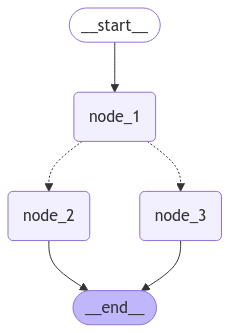

In [7]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Add the logic of the graph
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_vote)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Compile the graph
graph = builder.compile()

# Visualize the graph
display(Image(graph.get_graph().draw_mermaid_png()))

## Run the app
* The compiled graph implements the runnable protocol, a standard way to execute LangChain components. Because of that, we can use `invoke` as one of the standard methods to run this app.
* Our initial input is the dictionary `{"graph_state": "Hi, this is Joe Biden."}`, which sets the initial value for the state dict.
* When `invoke` is called:
    * The graph starts execution from the `START` node.
    * It progresses through the defined nodes (`node_1`, `node_2`, `node_3`) in order.
    * The conditional edge will traverse from node `1` to node `2` or `3` using a 60/40 decision rule.
    * Each node function receives the current state and returns a new value, which overrides the graph state.
    * The execution continues until it reaches the `END` node.

In [10]:
graph.invoke({"graph_state" : "Hi, this is Joe Biden."})

---Node 1---
---Node 2---


{'graph_state': 'Hi, this is Joe Biden. I will vote for Donald Trump'}

* As you see, in our example the conditional router went to Node 2, so in this case Joe Biden would vote for Donald Trump!

![Simple graph](graph001.png)

## How to execute the code from Visual Studio Code
* In Visual Studio Code, see the file 003-basic-langgraph.py
* In terminal, make sure you are in the directory of the file and run:
    * python 003-basic-graph.py